In [1]:
import pandas as pd
import numpy as np

# Creating dataset with missing values and outliers
data_with_missing_outliers = {
    "Sales": [1500, 2300, 1800, 2700, np.nan, 1200, 4100, 2900, 3200, 2500, 99999, 3100,
              3800, 2600, 1400, 3200, -5000, 1900, 4500, 2800, 3100, 2400, 4200, 3500,
              3900, 2700, 3000, 3300, 4100, 2800, 3800, 3500, 2200, 2700, 3600, np.nan,
              2900, 3400, 2800, 3000, 3200, 2600, 99999, 3100],




    "Region": ["North", "South", "East", "West", "North", "South", "East", "West", "North", np.nan, "East", "West",
               "North", "South", "East", "West", "North", "South", "East", "West", "North", "South", "East", np.nan,
               "North", "South", "East", "West", "North", "South", "East", "West", "North", "South", "East", "West",
               "North", "South", "East", "West", "North", "South", "East", "West"],

    "Product Category": ["Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", np.nan,
                         "Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", "Office Supplies",
                         "Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", "Office Supplies",
                         "Electronics", "Furniture", "Office Supplies", "Electronics", np.nan, "Office Supplies",
                         "Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", "Office Supplies",
                         "Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", "Office Supplies",
                         "Electronics", "Furniture", "Office Supplies", "Electronics", "Furniture", "Office Supplies",
                         "Electronics", "Furniture"],

    "Profit": [300, 500, np.nan, 700, 1200, 150, 900, 600, 1100, 450, 1300, 750,
               1100, 500, 200, 800, 1000, 300, 110000, 550, np.nan, 400, 1250, 950,
               1050, 600, 800, np.nan, 1300, 700, 1000, 900, 450, 700, 1100, 1200,
               500, 1000, 750, 850, 950, 600, 1100, 700]


}

# Creating a DataFrame
df_missing_outliers = pd.DataFrame(data_with_missing_outliers)

# Saving to CSV file
csv_filename_outliers = "Gobal_supersales.csv"
df_missing_outliers.to_csv(csv_filename_outliers, index=False)

print(f"CSV file '{csv_filename_outliers}' has been created successfully!")


CSV file 'Gobal_supersales.csv' has been created successfully!


In [2]:
df = pd.read_csv('Gobal_supersales.csv')
x=df.iloc[:,0:3].values
y=df.iloc[:,3].values


In [3]:
print(x)

[[1500.0 'North' 'Electronics']
 [2300.0 'South' 'Furniture']
 [1800.0 'East' 'Office Supplies']
 [2700.0 'West' 'Electronics']
 [nan 'North' 'Furniture']
 [1200.0 'South' nan]
 [4100.0 'East' 'Electronics']
 [2900.0 'West' 'Furniture']
 [3200.0 'North' 'Office Supplies']
 [2500.0 nan 'Electronics']
 [99999.0 'East' 'Furniture']
 [3100.0 'West' 'Office Supplies']
 [3800.0 'North' 'Electronics']
 [2600.0 'South' 'Furniture']
 [1400.0 'East' 'Office Supplies']
 [3200.0 'West' 'Electronics']
 [-5000.0 'North' 'Furniture']
 [1900.0 'South' 'Office Supplies']
 [4500.0 'East' 'Electronics']
 [2800.0 'West' 'Furniture']
 [3100.0 'North' 'Office Supplies']
 [2400.0 'South' 'Electronics']
 [4200.0 'East' nan]
 [3500.0 nan 'Office Supplies']
 [3900.0 'North' 'Electronics']
 [2700.0 'South' 'Furniture']
 [3000.0 'East' 'Office Supplies']
 [3300.0 'West' 'Electronics']
 [4100.0 'North' 'Furniture']
 [2800.0 'South' 'Office Supplies']
 [3800.0 'East' 'Electronics']
 [3500.0 'West' 'Furniture']
 [22

In [4]:
print(y)

[   300.    500.     nan    700.   1200.    150.    900.    600.   1100.
    450.   1300.    750.   1100.    500.    200.    800.   1000.    300.
 110000.    550.     nan    400.   1250.    950.   1050.    600.    800.
     nan   1300.    700.   1000.    900.    450.    700.   1100.   1200.
    500.   1000.    750.    850.    950.    600.   1100.    700.]


In [7]:
print(df.info())  # Check data types & missing values
print(df.head())  # Preview first 5 rows
print(df.describe())  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             42 non-null     float64
 1   Region            42 non-null     object 
 2   Product Category  42 non-null     object 
 3   Profit            41 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.5+ KB
None
    Sales Region Product Category  Profit
0  1500.0  North      Electronics   300.0
1  2300.0  South        Furniture   500.0
2  1800.0   East  Office Supplies     NaN
3  2700.0   West      Electronics   700.0
4     NaN  North        Furniture  1200.0
              Sales         Profit
count     42.000000      41.000000
mean    7388.047619    3445.121951
std    21008.438259   17059.890111
min    -5000.000000     150.000000
25%     2600.000000     550.000000
50%     3000.000000     800.000000
75%     3500.000000    1050.000000
max    99999.000000  110000

**Handling missing values**

In [8]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values for numerical columns with mean
df["Sales"].fillna(df["Sales"].mean(), inplace=True)
df["Profit"].fillna(df["Profit"].mean(), inplace=True)

# Fill missing categorical values with the most frequent value (mode)
df["Region"].fillna(df["Region"].mode()[0], inplace=True)
df["Product Category"].fillna(df["Product Category"].mode()[0], inplace=True)


Missing values:
 Sales               2
Region              2
Product Category    2
Profit              3
dtype: int64


<ipython-input-8-a8a505f6aa36>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(df["Sales"].mean(), inplace=True)
<ipython-input-8-a8a505f6aa36>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [9]:
df.isnull().sum()

,0
Sales,0
Region,0
Product Category,0
Profit,0


**Removing duplicates**

In [10]:
# Check for duplicates
print("Duplicates before removal:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Duplicates after removal:", df.duplicated().sum())


Duplicates before removal: 0
Duplicates after removal: 0


**detect and handling outliers**

In [11]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from Sales & Profit
df = remove_outliers(df, "Sales")
df = remove_outliers(df, "Profit")

print("Dataset after outlier removal:", df.shape)


Dataset after outlier removal: (35, 4)


**Statistical analysis**

In [12]:
print("Mean Sales:", df["Sales"].mean())
print("Median Sales:", df["Sales"].median())
print("Standard Deviation of Sales:", df["Sales"].std())
print("Variance of Sales:", df["Sales"].var())

print("Mean Profit:", df["Profit"].mean())
print("Median Profit:", df["Profit"].median())
print("Standard Deviation of Profit:", df["Profit"].std())
print("Variance of Profit:", df["Profit"].var())


Mean Sales: 2931.4285714285716
Median Sales: 2900.0
Standard Deviation of Sales: 741.1324516740377
Variance of Sales: 549277.3109243698
Mean Profit: 727.1428571428571
Median Profit: 700.0
Standard Deviation of Profit: 293.64415668680095
Variance of Profit: 86226.8907563025


correlation analysis

In [14]:
# Compute correlation matrix for all numerical columns
correlation_matrix = df.corr(numeric_only=True)  # Ensure only numerical data is used

# Print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Print correlation specifically between Sales & Profit
print("Correlation between Sales & Profit:\n", df[["Sales", "Profit"]].corr())


Correlation Matrix:
            Sales    Profit
Sales   1.000000  0.931852
Profit  0.931852  1.000000
Correlation between Sales & Profit:
            Sales    Profit
Sales   1.000000  0.931852
Profit  0.931852  1.000000


**Data visualization**

histogram of sales and profit

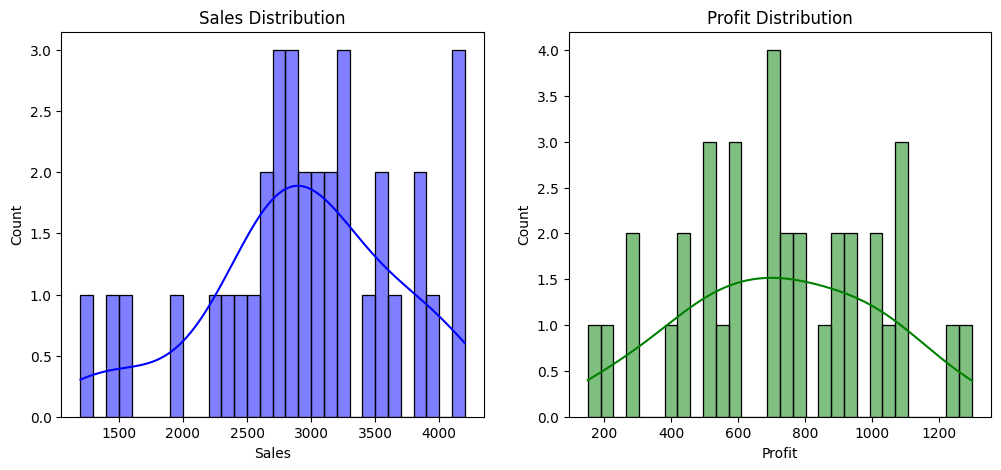

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Sales"], bins=30, kde=True, color='blue')
plt.title("Sales Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["Profit"], bins=30, kde=True, color='green')
plt.title("Profit Distribution")

plt.show()


Box plot of sales and profit

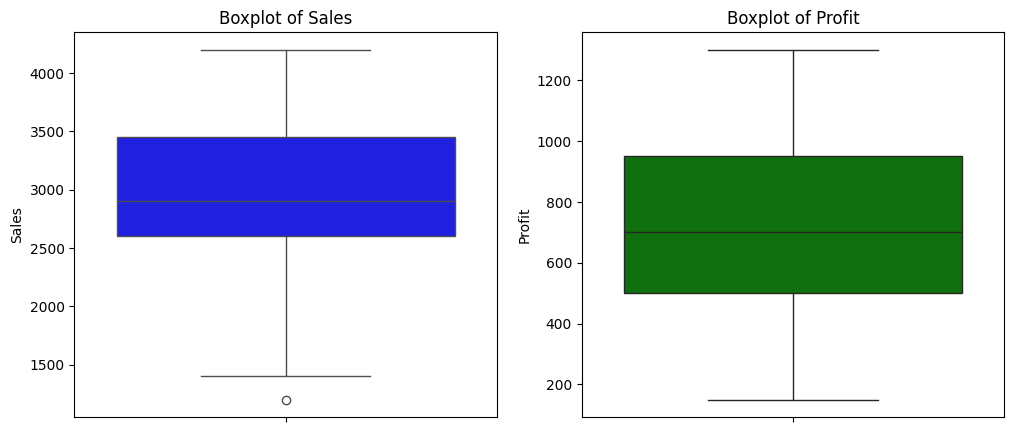

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Sales"], color='blue')
plt.title("Boxplot of Sales")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Profit"], color='green')
plt.title("Boxplot of Profit")

plt.show()


heapmap of sales and profit

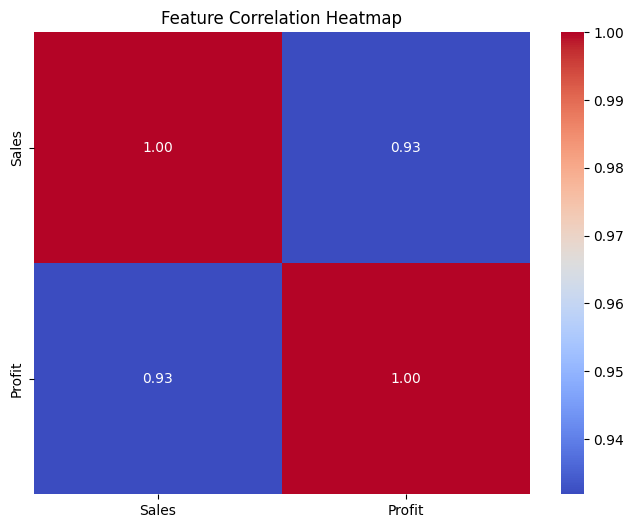

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
